   # IMPLEMENTING XGBOOST ALGORITHM

In [19]:
#import library packages
import pandas as pd

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load given dataset
data = pd.read_csv("city_day.csv")

In [22]:
df = data.dropna()

In [23]:
del df['City']
del df['Date']
del df['AQI']

In [24]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],
      dtype='object')

In [25]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,Moderate
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,Moderate
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,Moderate
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,Moderate
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,Moderate


In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['AQI_Bucket']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [27]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,1
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,1
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,1
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,1
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,1


In [28]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='AQI_Bucket', axis=1)
#Response variable
y = df.loc[:,'AQI_Bucket']  

In [29]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  4365
Number of test dataset:  1871
Total number of dataset:  6236


##### Implementing XGBClassifier Algo

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [31]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predicted = xg.predict(X_test)

Finding Accuracy

In [32]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of XGBClassifier',accuracy*100)

Accuracy of XGBClassifier 82.84339925173704


Finding Clasiification Report

In [33]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

           0       0.78      0.70      0.74       136
           1       0.86      0.87      0.87       756
           2       0.74      0.77      0.76       195
           3       0.82      0.84      0.83       624
           4       0.81      0.92      0.86        37
           5       0.86      0.72      0.78       123

    accuracy                           0.83      1871
   macro avg       0.81      0.80      0.81      1871
weighted avg       0.83      0.83      0.83      1871



Finding Confusion matrix

In [34]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 95   0   0  41   0   0]
 [  1 661  25  68   0   1]
 [  0  32 150   2   1  10]
 [ 26  76   0 522   0   0]
 [  0   0   0   0  34   3]
 [  0   1  27   0   7  88]]


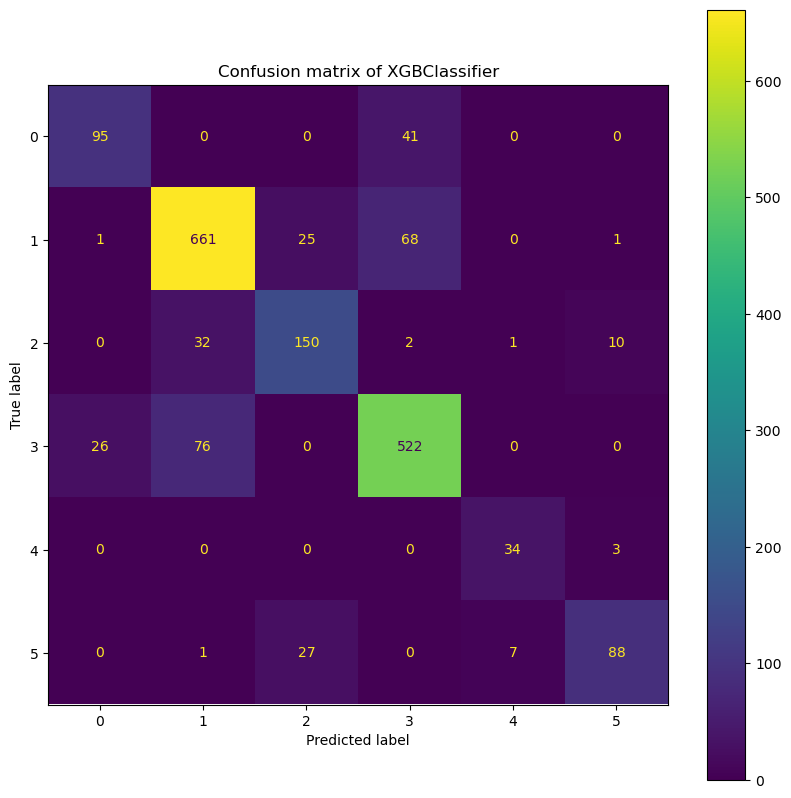

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(xg, X_test, y_test, ax=ax)
plt.title('Confusion matrix of XGBClassifier')
plt.show()

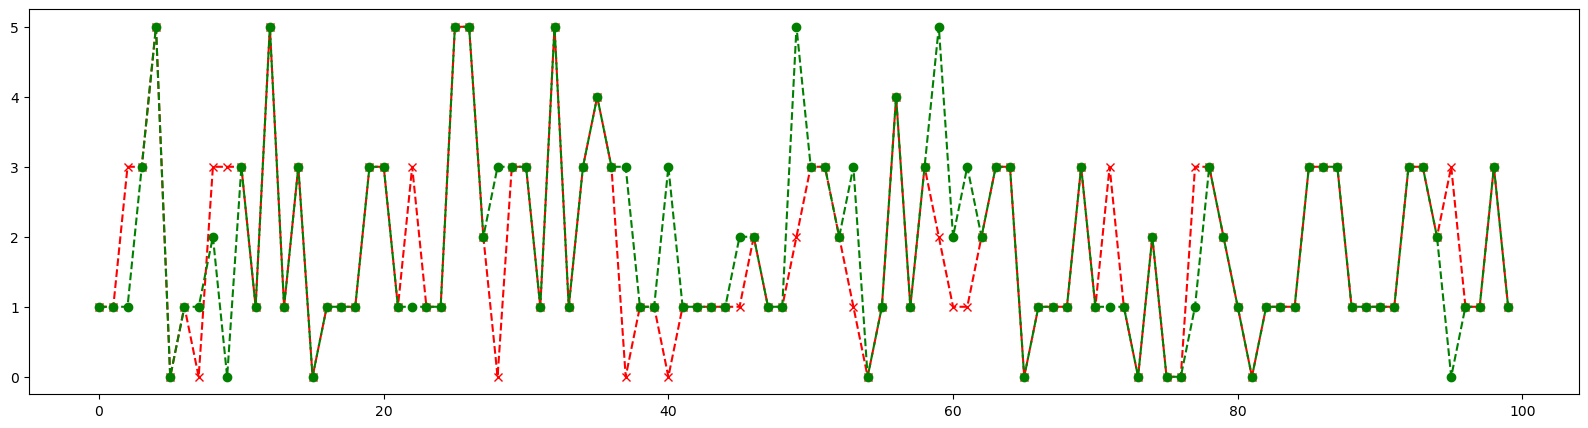

In [36]:
import matplotlib.pyplot as plt

df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()